In [68]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Сгенерируйте 𝑀 = 100 выборок 𝑋1, ..., 𝑋1000 из равномерного распределения на отрезке [0, 𝜃].

In [69]:
samples = []
N = 1000
M = 100
theta = 5
for i in range(M):
    samples.append(sts.uniform.rvs(size=N, loc=0, scale=theta))

Для каждой выборки 𝑋1, . . . , 𝑋𝑛 для всех 𝑛 <= 1000 посчитайте оценки параметра 𝜃 из теоретической задачи: 2𝑋,(𝑛 + 1)𝑋(1), 𝑋(1) + 𝑋(𝑛), 𝑛+1 / 𝑛 𝑋(𝑛).

In [70]:
res = [[[[]for i in range(M)] for n in range(N)] for k in range(5)]
for i in range(M):
    for n in range(1, N + 1):
        res[0][n - 1][i] = (2. * np.mean(samples[i][:n]))
        res[1][n - 1][i] = (np.mean(samples[i][:n]) + np.max(samples[i][:n]) / 2.)
        res[2][n - 1][i] = ((n + 1.) * np.min(samples[i][:n]))
        res[3][n - 1][i] = (np.min(samples[i][:n]) + np.max(samples[i][:n]))
        res[4][n - 1][i] = ((n + 1.) / n * np.max(samples[i][:n]))

Посчитайте для всех полученых оценок ˆ𝜃 квадратичную функцию потерь (𝜃* − 𝜃)^2 и для каждого фиксированного 𝑛 усредните по выборкам.

In [71]:
g = [[[[]for i in range(M)] for n in range(N)] for k in range(5)]
for i in range(M):
    for n in range(N):
        for k in range(5):
            g[k][n][i] = (res[k][n][i] - theta) ** 2
sg = [[[] for n in range(N)] for k in range(5)]
for k in range(5):
    for n in range(N):
        sg[k][n] = np.mean(np.array(g[k][n]))

Для каждого из трех значений 𝜃 постройте графики усредненных функций потерь в зависимости от 𝑛.

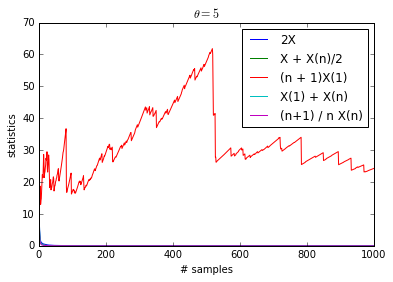

In [72]:
s = ["2X", "X + X(n)/2","(n + 1)X(1)", "X(1) + X(n)", "(n+1) / n X(n)"]
x = np.arange(1, N + 1)
for k in range(5):
    plt.plot(x, sg[k], label=s[k])
plt.title("$\\theta = " + str(theta) + "$")
plt.xlabel("# samples")
plt.ylabel("statistics")
plt.legend()
plt.show()

Видим, что красный график явно выбивается - уберем его и увеличим масштаб. Проделаем предыдущие шаги для еще трех тета.

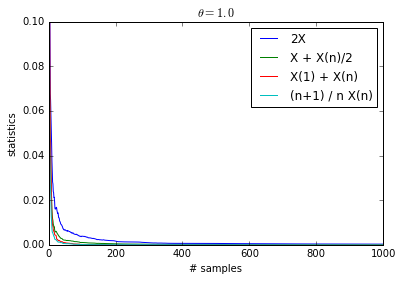

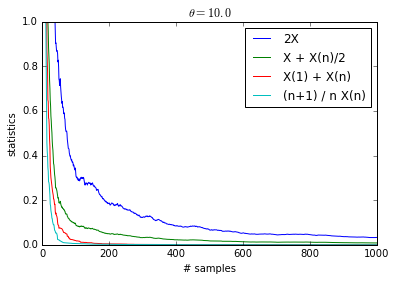

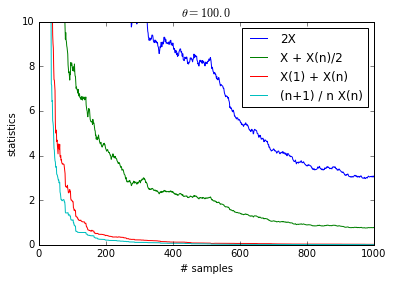

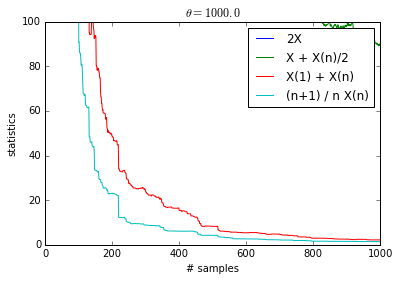

In [73]:
for theta in [1., 10., 100., 1000.]:
    samples = []
    N = 1000
    M = 100
    for i in range(M):
        samples.append(sts.uniform.rvs(size=N, loc=0, scale=theta))
    res = [[[[]for i in range(M)] for n in range(N)] for k in range(4)]
    for i in range(M):
        for n in range(1, N + 1):
            res[0][n - 1][i] = (2. * np.mean(samples[i][:n]))
            res[1][n - 1][i] = (np.mean(samples[i][:n]) + np.max(samples[i][:n]) / 2.)
            res[2][n - 1][i] = (np.min(samples[i][:n]) + np.max(samples[i][:n]))
            res[3][n - 1][i] = ((n + 1.) / n * np.max(samples[i][:n]))
    g = [[[[]for i in range(M)] for n in range(N)] for k in range(4)]
    for i in range(M):
        for n in range(N):
            for k in range(4):
                g[k][n][i] = (res[k][n][i] - theta) ** 2
    sg = [[[] for n in range(N)] for k in range(4)]
    for k in range(4):
        for n in range(N):
            sg[k][n] = np.mean(np.array(g[k][n]))
    s = ["2X", "X + X(n)/2", "X(1) + X(n)", "(n+1) / n X(n)"]
    x = np.arange(1, N + 1)
    for k in range(4):
        plt.plot(x, sg[k], label=s[k])
    plt.ylim([0, theta / 10])
    plt.title("$\\theta = " + str(theta) + "$")
    plt.xlabel("# samples")
    plt.ylabel("statistics")
    plt.legend()
    plt.show()